# Solution of the Exercises in Air quality data visualization notebook

Air quality is based on the concentration of pollutants present in the air at a particular location. It can happen that air is clear and contains only small amounts of solid particle and chemical pollutants. It can also happen that air contains high levels of pollutants, being dangerous to health and the environment. 

In the following we are going to explore air quality data by making plots with `pandas`, `matplotlib` and `seaborn` libraries.
1. Prepare settings
1. Load Data
1. Explore data with pandas
1. Make data is more insightful
1. Make visualization with matplotlib and seaborn
1. Analyze by AQI levels

## Prepare settings

Add a `save_plots` notebook that contains a set of functions useful for the data visualization.

In [1]:
%run ../scripts/setup.ipynb
%run save_plots.ipynb 

In [2]:
plt.rcParams['figure.figsize'] =  (15,5)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
plt.rcParams['text.color'] = '#4c4c4c'
plt.rcParams['axes.labelcolor']= '#4c4c4c'
plt.rcParams['xtick.color'] = '#4c4c4c'
plt.rcParams['ytick.color'] = '#4c4c4c'
plt.rcParams['font.size'] = 12

Check the content of the current folder.

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'air_quality_data_visualization_exercise_solution.ipynb',
 'air_quality_data_visualization_exercise_solution.ipynb.OLD',
 'california_housing_price_data_exploration.ipynb',
 'save_plots.ipynb']

Check the content of a folder given its name.

In [4]:
os.listdir(PATH)

['.git',
 'data',
 'images',
 'README.md',
 'results',
 'scripts',
 'slides',
 'use_cases']

## Data 

The considered data are for the `Hanoi` location in Vietnam. The data have been already downloaded and put in the `data` folder. The data have been downloaded from the `Airnow.gov` website that provides you air quality data for different countries over years. It collects [`Air Quality Monitoring data`]((https://www.airnow.gov/)) from U.S. embassies and consulates around the world to inform U.S. personnel and citizens overseas.

Check to see if the `Hanoi_PM2.5_2018_YTD.csv` file is in the `data` folder.

In [5]:
os.listdir(f'{DATA_PATH}')

['Hanoi_PM2.5_2018_YTD.csv', 'housing.csv']

## Explore data with Pandas

Load the data in the memory.

In [6]:
df = pd.read_csv(f'{DATA_PATH}/Hanoi_PM2.5_2018_YTD.csv')

See the first 5 row of the file.

In [7]:
df.head()

Site          Parameter            Date (LT)  Year  Month  Day  Hour  \
0  Hanoi  PM2.5 - Principal  2018-01-01 01:00 AM  2018      1    1     1   
1  Hanoi  PM2.5 - Principal  2018-01-01 02:00 AM  2018      1    1     2   
2  Hanoi  PM2.5 - Principal  2018-01-01 03:00 AM  2018      1    1     3   
3  Hanoi  PM2.5 - Principal  2018-01-01 04:00 AM  2018      1    1     4   
4  Hanoi  PM2.5 - Principal  2018-01-01 05:00 AM  2018      1    1     5   

   NowCast Conc.  AQI AQI Category  Raw Conc. Conc. Unit Duration QC Name  
0           68.9  158    Unhealthy       69.2      UG/M3     1 Hr   Valid  
1           72.2  160    Unhealthy       75.5      UG/M3     1 Hr   Valid  
2           81.2  164    Unhealthy       90.2      UG/M3     1 Hr   Valid  
3           89.4  169    Unhealthy       97.6      UG/M3     1 Hr   Valid  
4           89.2  168    Unhealthy       89.1      UG/M3     1 Hr   Valid

Use the `.info()` function to get high-level details about your data.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8339 entries, 0 to 8338
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           8339 non-null   object 
 1   Parameter      8339 non-null   object 
 2   Date (LT)      8339 non-null   object 
 3   Year           8339 non-null   int64  
 4   Month          8339 non-null   int64  
 5   Day            8339 non-null   int64  
 6   Hour           8339 non-null   int64  
 7   NowCast Conc.  8339 non-null   float64
 8   AQI            8339 non-null   int64  
 9   AQI Category   8100 non-null   object 
 10  Raw Conc.      8339 non-null   float64
 11  Conc. Unit     8339 non-null   object 
 12  Duration       8339 non-null   object 
 13  QC Name        8339 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 912.2+ KB


1. There are many columns included in the dataset for its completeness. such as `Site`, `Parameter`, and `Conc.(entration) Unit`.
1. Most columns contain 8,339 rows. There are missing values, e.g. `AQI Category` has only 8,100 rows. 
1. The columns more important, than others, are `Date (LT) latitude`, `Raw Conc.(entration)`, and `QC (quality control) Name`. Other columns are derived from these three columns.

The PM<sub>2.5</sub> or particulate mattters that has a diameter of 2.5 micrometer or less is one of outdoor pollutant regulated. Depending on the country, the standard (or recommendation) of daily concentration is different, e.g. the recommendation of [World Health Organization](https://www.who.int/health-topics/air-pollution#tab=tab_1) is [25 &mu;g/m<sup>3</sup>](https://apps.who.int/iris/bitstream/handle/10665/69477/WHO_SDE_PHE_OEH_06.02_eng.pdf) daily average, [35 &mu;g/m<sup>3</sup>](https://www.epa.gov/pm-pollution/2006-national-ambient-air-quality-standards-naaqs-particulate-matter-pm25) by US EPA, and [50 &mu;g/m<sup>3</sup>](https://www.env.go.jp/air/tech/ine/asia/vietnam/files/law/QCVN%2005-2013.pdf) by Vietname Environmental Administration.

Have a look at the static distribution.

In [9]:
df.describe()

Year        Month          Day         Hour  NowCast Conc.  \
count  8339.000000  8339.000000  8339.000000  8339.000000    8339.000000   
mean   2018.000120     6.584123    15.971939    11.561338      10.679398   
std       0.010951     3.485221     8.801531     6.907012     175.955430   
min    2018.000000     1.000000     1.000000     0.000000    -999.000000   
25%    2018.000000     4.000000     8.000000     6.000000      19.000000   
50%    2018.000000     7.000000    16.000000    12.000000      31.300000   
75%    2018.000000    10.000000    24.000000    18.000000      49.900000   
max    2019.000000    12.000000    31.000000    23.000000     235.800000   

               AQI    Raw Conc.  
count  8339.000000  8339.000000  
mean     70.699125    22.647859  
std     188.781578   139.447799  
min    -999.000000  -999.000000  
25%      66.000000    18.850000  
50%      91.000000    31.700000  
75%     136.000000    51.800000  
max     286.000000   323.000000

1. Only numeric columns are listed here
1. Notice `-999` in `NowCast Conc.(entration)`, `AQI` and `Raw Conc.` columns
1. The mean `Raw Conc.(entration)` is `22` &mu;g/m<sup>3</sup>

`NowCast Conc.(entration)` corresponds to current air quality and compute conditions more similar with what people are actually seeing or experiencing.

Visualize concentration by using the `line_plot()` function.

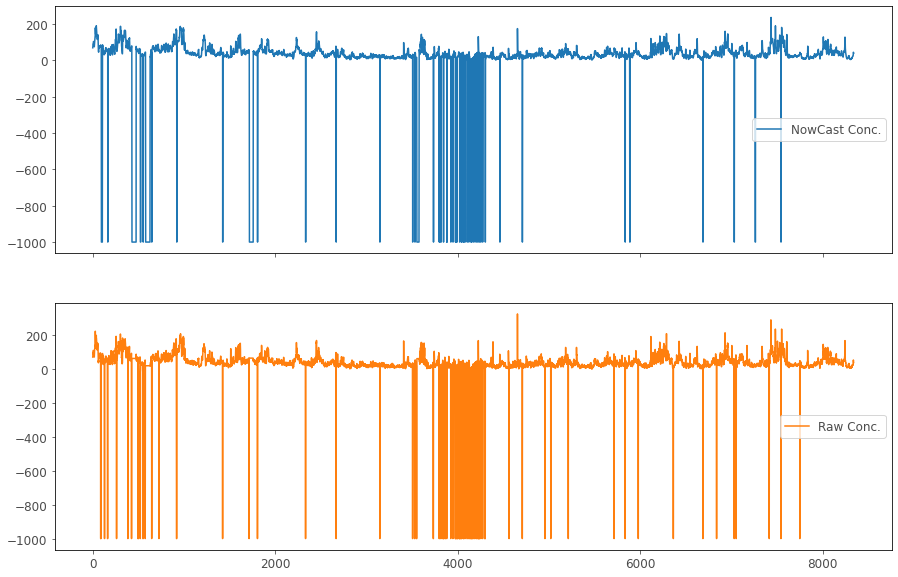

In [10]:
line_plot(df[['NowCast Conc.', 'Raw Conc.']], 'double_line_plots', use_color=False, subplot=True)

**Note**: The `-999`s make the graph **skewed** and cannot see the trend. Make a quick fix by excluding `-999` values.

In [11]:
df.columns

Index(['Site', 'Parameter', 'Date (LT)', 'Year', 'Month', 'Day', 'Hour',
       'NowCast Conc.', 'AQI', 'AQI Category', 'Raw Conc.', 'Conc. Unit',
       'Duration', 'QC Name'],
      dtype='object')

Filter out negative values in `NowCast Conc.(entration)` column. Visualize concentration by using the `line_plot()` function.

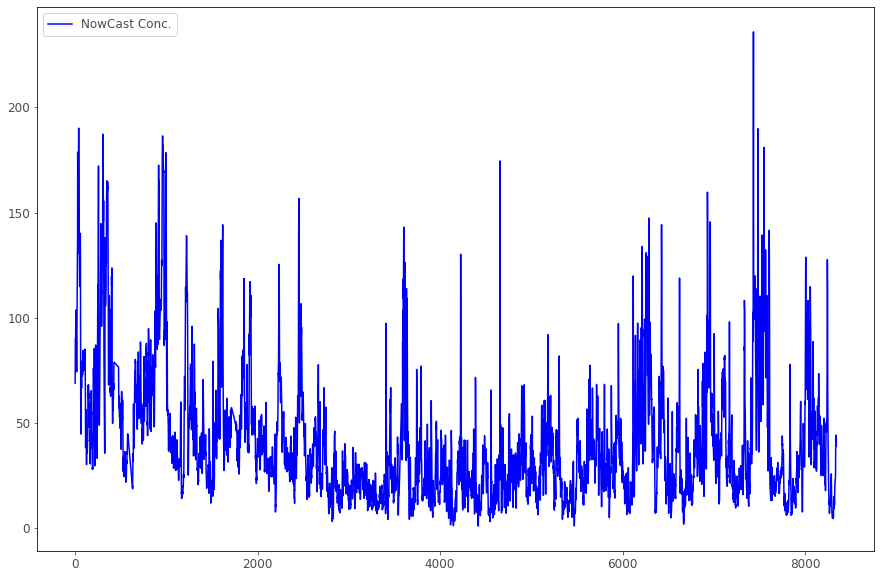

In [12]:
line_plot(df[df['NowCast Conc.'] > 0]['NowCast Conc.'], 'nowcast_conc_filtered_out_line_plot')

1. First `df['NowCast Conc.'] > 0` yields a maxtrix (table) with `False` or `True` value for each cell
1. Only cells with `True` value selected by `df[df['NowCast Conc.']>0]`
1. Next the column `NowCast Conc.` is selected by `df[df['NowCast Conc.']['NowCast Conc.']`
1. Finally, `plot` function is called to display the clean data

Filter out negative values in `Raw Conc.(entration)` column. Visualize concentration by using the `line_plot()` function.

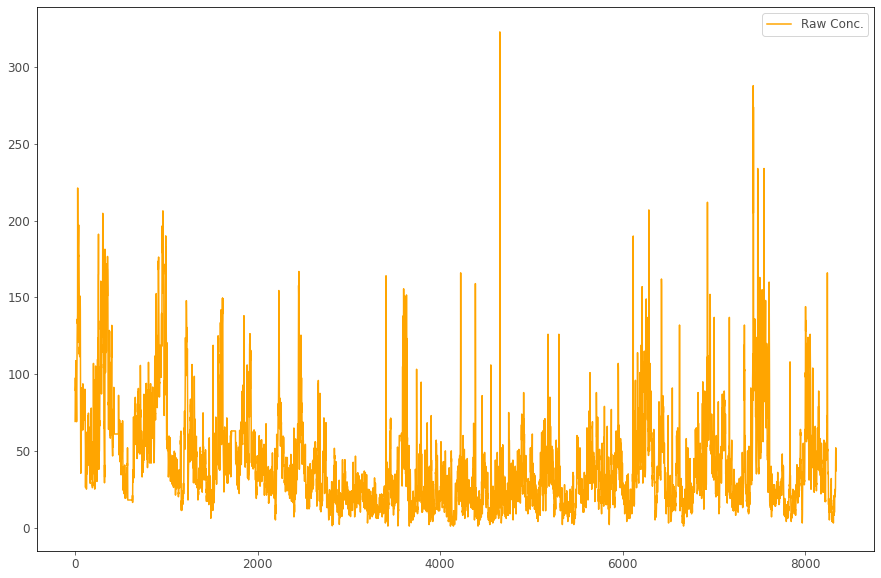

In [13]:
line_plot(df[df['Raw Conc.'] > 0]['Raw Conc.'], 'raw_conc_filtered_out_line_plot', color='orange')

##  Make data is more insightful

1. Transformed the `Date (LT)` string into a `datetime` object
1. Set the index with the datetime object
1. Remove redundant columns

In [14]:
# convert string to datetime and set this column as the index
df['Date (LT)'] = pd.to_datetime(df['Date (LT)'])
# set a column as the index
df.set_index('Date (LT)', inplace=True)
df.head()

Site          Parameter  Year  Month  Day  Hour  \
Date (LT)                                                               
2018-01-01 01:00:00  Hanoi  PM2.5 - Principal  2018      1    1     1   
2018-01-01 02:00:00  Hanoi  PM2.5 - Principal  2018      1    1     2   
2018-01-01 03:00:00  Hanoi  PM2.5 - Principal  2018      1    1     3   
2018-01-01 04:00:00  Hanoi  PM2.5 - Principal  2018      1    1     4   
2018-01-01 05:00:00  Hanoi  PM2.5 - Principal  2018      1    1     5   

                     NowCast Conc.  AQI AQI Category  Raw Conc. Conc. Unit  \
Date (LT)                                                                    
2018-01-01 01:00:00           68.9  158    Unhealthy       69.2      UG/M3   
2018-01-01 02:00:00           72.2  160    Unhealthy       75.5      UG/M3   
2018-01-01 03:00:00           81.2  164    Unhealthy       90.2      UG/M3   
2018-01-01 04:00:00           89.4  169    Unhealthy       97.6      UG/M3   
2018-01-01 05:00:00           89.2  168    Unhealthy       89.1      UG/M3   

                    Duration QC Name  
Date (LT)                             
2018-01-01 01:00:00     1 Hr   Valid  
2018-01-01 02:00:00     1 Hr   Valid  
2018-01-01 03:00:00     1 Hr   Valid  
2018-01-01 04:00:00     1 Hr   Valid  
2018-01-01 05:00:00     1 Hr   Valid

In [15]:
# check data type, the index has `DatetimeIndex`
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8339 entries, 2018-01-01 01:00:00 to 2019-01-01 00:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           8339 non-null   object 
 1   Parameter      8339 non-null   object 
 2   Year           8339 non-null   int64  
 3   Month          8339 non-null   int64  
 4   Day            8339 non-null   int64  
 5   Hour           8339 non-null   int64  
 6   NowCast Conc.  8339 non-null   float64
 7   AQI            8339 non-null   int64  
 8   AQI Category   8100 non-null   object 
 9   Raw Conc.      8339 non-null   float64
 10  Conc. Unit     8339 non-null   object 
 11  Duration       8339 non-null   object 
 12  QC Name        8339 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 912.1+ KB


Remove the first 5 columns and two columns near the last one.
* `inplace=True` specifies the change (remove columns) in the `df` DataFrame.

In [16]:
df.drop(columns=['Site', 'Parameter', 'Year', 'Month', 'Day', 'Hour', 'Conc. Unit', 'Duration'], inplace=True)
df.head()

NowCast Conc.  AQI AQI Category  Raw Conc. QC Name
Date (LT)                                                              
2018-01-01 01:00:00           68.9  158    Unhealthy       69.2   Valid
2018-01-01 02:00:00           72.2  160    Unhealthy       75.5   Valid
2018-01-01 03:00:00           81.2  164    Unhealthy       90.2   Valid
2018-01-01 04:00:00           89.4  169    Unhealthy       97.6   Valid
2018-01-01 05:00:00           89.2  168    Unhealthy       89.1   Valid

Filter the data and assign the cleaned DataFrame to `df2`.

In [17]:
df2 = df[df['Raw Conc.']>=0]
df2.describe()

NowCast Conc.          AQI    Raw Conc.
count    8190.000000  8190.000000  8190.000000
mean       10.626288    70.710134    40.752259
std       176.425577   189.279538    31.456565
min      -999.000000  -999.000000     0.000000
25%        19.000000    66.000000    19.000000
50%        31.400000    92.000000    32.000000
75%        50.075000   137.000000    52.000000
max       235.800000   286.000000   323.000000

1. `-999` values have been removed from `Raw Conc.` column, but they are still in the `AQI` and `NowCast Conc.`
1. There are less rows in `df2` (8,190) vs. 8,339 in `df`
1. The mean value for `Raw Conc.(entration)` is 40.7 &mu;g/m<sup>3</sup>, and the median is 32 &mu;g/m<sup>3</sup> (in `df`, the mean value is `22.6` &mu;g/m<sup>3</sup>)
1. Small mistakes could lead to an inaccurate results, and a wrong interpretation (ie. mean, median)

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2018-01-01 01:00:00 to 2019-01-01 00:00:00
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NowCast Conc.  8190 non-null   float64
 1   AQI            8190 non-null   int64  
 2   AQI Category   7954 non-null   object 
 3   Raw Conc.      8190 non-null   float64
 4   QC Name        8190 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 383.9+ KB


See concentration in 2018 with timeseris by using the `line_plot()` function.

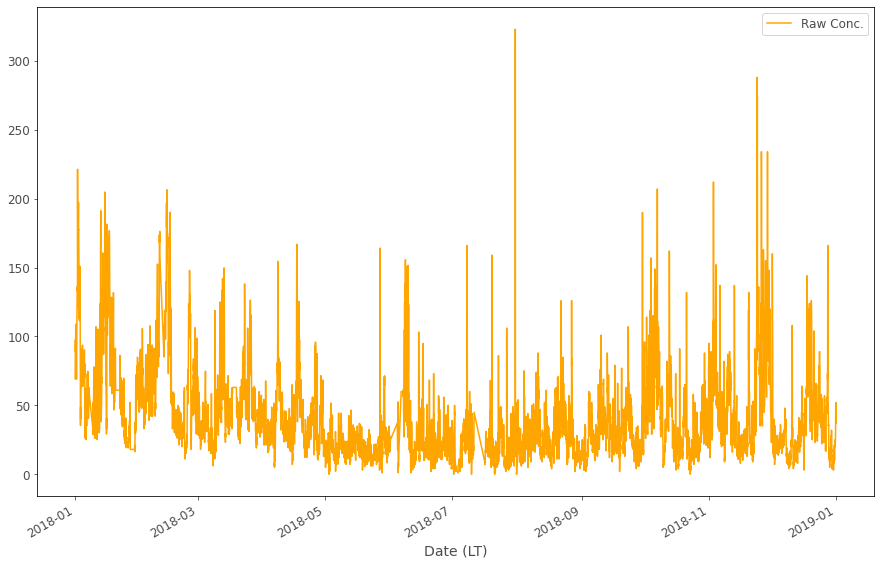

In [19]:
line_plot(df2['Raw Conc.'], 'raw_conc_line_plot', color='orange')

A daily average could make the graph less messy. 

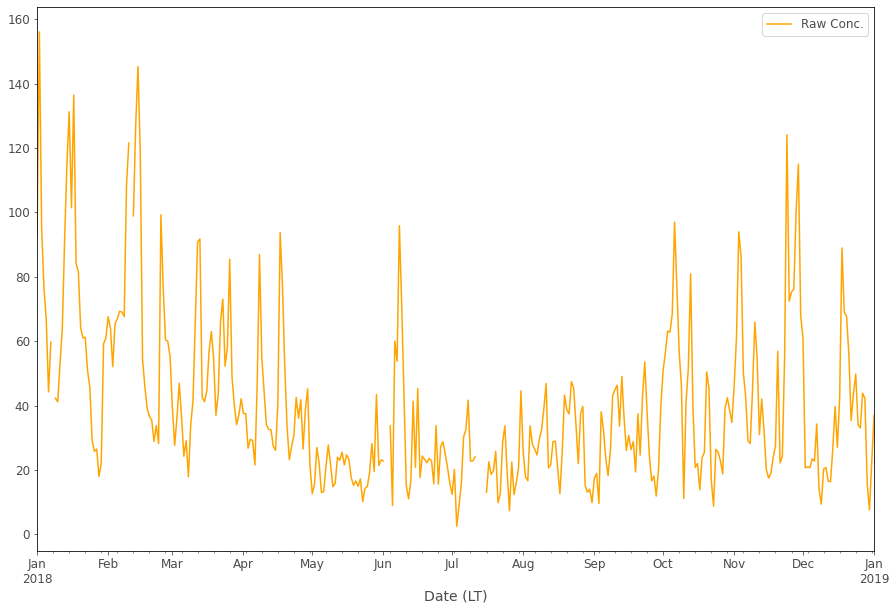

In [20]:
line_plot(df2[['Raw Conc.']].resample('1D').mean(), 'raw_conc_1D_line_plot', color='orange')

Check the Quality Control (QC) of the 'Raw Conc.(entration)' data for environmnetal data. A valid `'QC Name' (about 98%) is `solid`.

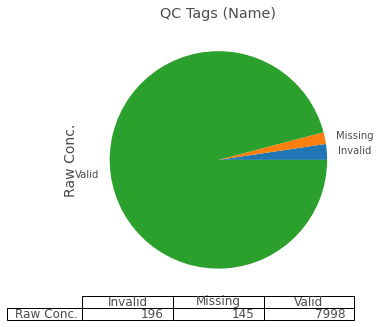

In [21]:
pie_plot(df.groupby('QC Name')['Raw Conc.'].count(), 'qc_name_raw_conc_pie')

The second line of code performs three primary operations as one:
1. Group all values in `QC Name` columns (`df.groupby('QC Name')` into category
2. Filter by one column `Raw Conc.` to reduce the DataFrame (matrix mxn) to series (two columns x rows)
3. `count()` the value of each tag (`Valid`, `Missing`, `Invalid`, `Suspect`)
4. Call `plot` to display the count of each tag

Save clean file back to local drive.

In [22]:
df2.to_csv(f'{RESULTS_PATH}/cleaned_Hanoi_PM2.5_2018_YTD.csv')

## Make visualization with matplotlib and seaborn

`pandas` is a powerful library to process data, with some handy plot tools. `pandas` is a good choice for data exploration;
`matplotlib` is a proper tool for visualization. `pandas` "borrows" some plotting functions from `matplotlib`.

1. Line plots
1. Pie chart for AQI levels

### Line plots

1. Reduce dimension from 5 columns to one column (in addition to the index column) by `df2[['Raw Conc.']]`
2. Grouped `Raw Conc.` by an interval of one day in `resample('1D')`, change `1D` to `10D`, or `30D` adjusts the interval
3. Calculated `mean()` of aggregated data, other function such as `std()` works as well
4. Finally, plot adding title and labels.

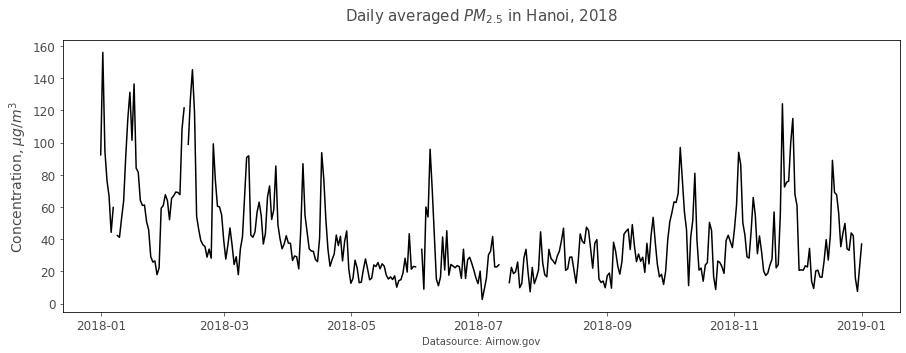

In [23]:
dft = df2[['Raw Conc.']].resample('1D').mean()
complex_line_plot(dft, '2018Jul_hanoi')

Use searborn to create the same plot.

In [24]:
sns.set_context("notebook", font_scale=1.3) #set the parameters that control the scaling of plot elements.

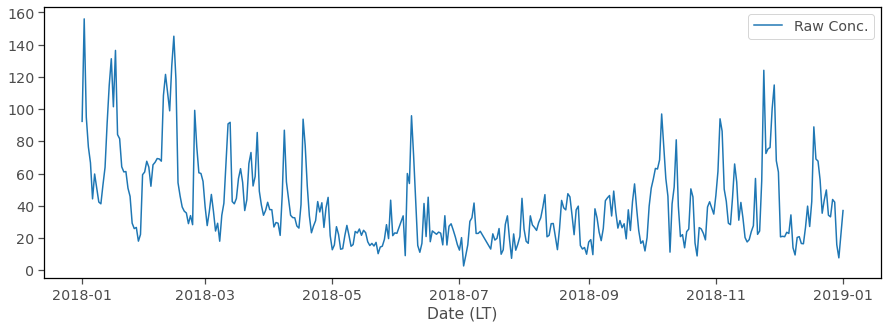

In [25]:
# minimal setup, and the axes and font look really nice already
sns.lineplot(data=dft)
plt.show()

Of course, you can combine both flexiblity of matplotlib and the nice setup of seaborn.

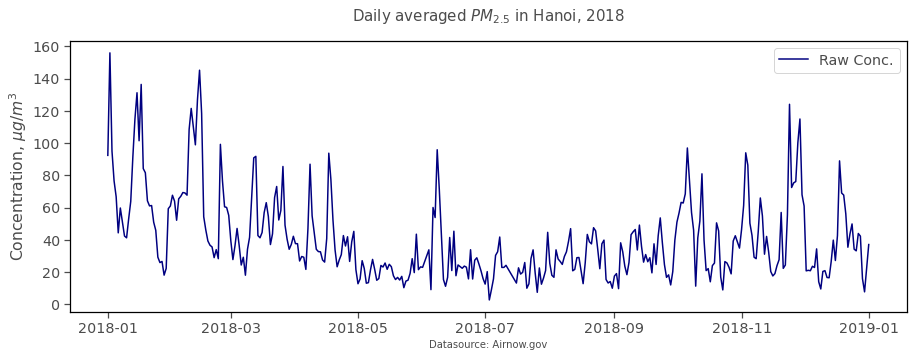

In [26]:
sns_complex_line_plot(dft, 'sns_2018Jul_hanoi')

**Note**: lineplot is the most simple one (beside scatter), for this setup, seaborn has not demonstrated its advantages.

In [27]:
colors = ['purple',  'red', 'orange', 'yellow', 'green']
orders = ['Very Unhealthy', 'Unhealthy', 'Unhealthy for Sensitive Groups', 'Moderate', 'Good']

In [28]:
colormap = dict(zip(orders, colors))
colormap

{'Very Unhealthy': 'purple',
 'Unhealthy': 'red',
 'Unhealthy for Sensitive Groups': 'orange',
 'Moderate': 'yellow',
 'Good': 'green'}

In [29]:
df2['AQI Category'].value_counts()

Moderate                          3730
Unhealthy for Sensitive Groups    1847
Unhealthy                         1611
Good                               684
Very Unhealthy                      82
Name: AQI Category, dtype: int64

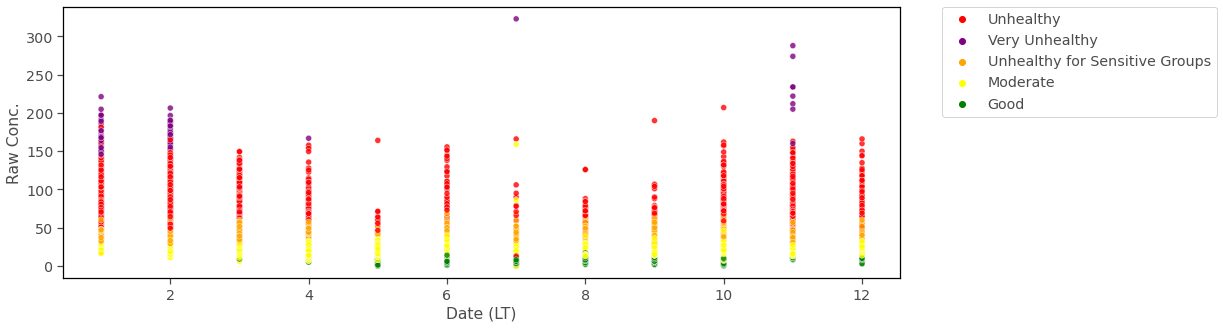

In [30]:
sns.scatterplot(data=df2, x=df2.index.month, y=df2['Raw Conc.'],
                hue='AQI Category', palette=colormap, alpha=0.8)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Note**: notice that there are some overlap between `AQI Category` and `Raw Conc.`. This is because AQI calculated from `NowCast Conc.`, and `NowCast Conc.` is a predicting value of daily concentration by calculating the last twelve hourly values of `Raw Conc.`

In [31]:
df2.head()

NowCast Conc.  AQI AQI Category  Raw Conc. QC Name
Date (LT)                                                              
2018-01-01 01:00:00           68.9  158    Unhealthy       69.2   Valid
2018-01-01 02:00:00           72.2  160    Unhealthy       75.5   Valid
2018-01-01 03:00:00           81.2  164    Unhealthy       90.2   Valid
2018-01-01 04:00:00           89.4  169    Unhealthy       97.6   Valid
2018-01-01 05:00:00           89.2  168    Unhealthy       89.1   Valid

See how the `Raw` and `NowCast` concentration look on graph. Of course, you can combine both flexiblity of matplotlib and the nice setup of seaborn.

Text(0, 0.5, 'Concentration, $\\mu g/m^3$')

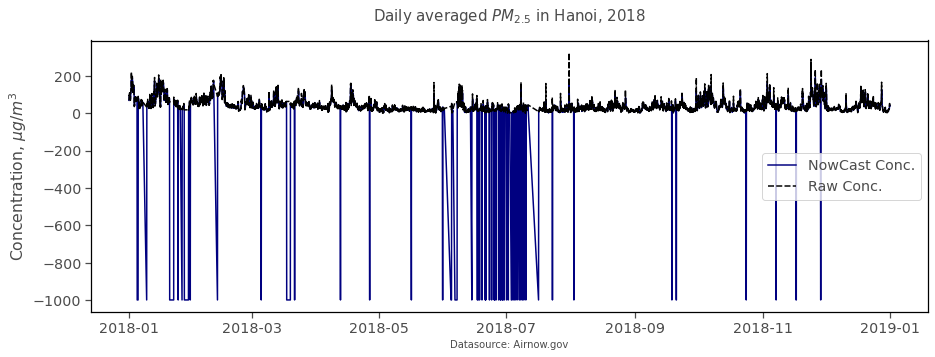

In [32]:
ax = sns.lineplot(data=df2[['NowCast Conc.', 'Raw Conc.']], palette = ['navy', 'black'])
ax.set_xlabel('Datasource: Airnow.gov', fontsize=10)
plt.title('Daily averaged $PM_{2.5}$ in Hanoi, 2018', fontsize=15, y=1.05)
plt.ylabel('Concentration, $\mu g/m^3$')

This is not great, messy instead. Let replace a `NULL` value with `-999s` error code in `NowCast Conc.`.

In [33]:
df2.shape

(8190, 5)

In [34]:
df2.loc[df2['NowCast Conc.'] < 0, 'NowCast Conc.'] = None

In [35]:
df2.shape

(8190, 5)

In [36]:
df2.loc[df2['NowCast Conc.'].isnull()]

NowCast Conc.  AQI AQI Category  Raw Conc.  QC Name
Date (LT)                                                               
2018-01-04 23:00:00            NaN -999          NaN       74.0  Invalid
2018-01-05 00:00:00            NaN -999          NaN       74.0  Invalid
2018-01-05 01:00:00            NaN -999          NaN       74.0  Invalid
2018-01-05 02:00:00            NaN -999          NaN       74.0  Invalid
2018-01-05 03:00:00            NaN -999          NaN       74.0  Invalid
...                            ...  ...          ...        ...      ...
2018-11-17 00:00:00            NaN -999          NaN       16.0  Invalid
2018-11-17 01:00:00            NaN -999          NaN       16.0  Invalid
2018-11-17 02:00:00            NaN -999          NaN       16.0  Invalid
2018-11-17 03:00:00            NaN -999          NaN       15.0    Valid
2018-11-28 20:00:00            NaN -999          NaN       92.0    Valid

[236 rows x 5 columns]

In [37]:
df2.head()

NowCast Conc.  AQI AQI Category  Raw Conc. QC Name
Date (LT)                                                              
2018-01-01 01:00:00           68.9  158    Unhealthy       69.2   Valid
2018-01-01 02:00:00           72.2  160    Unhealthy       75.5   Valid
2018-01-01 03:00:00           81.2  164    Unhealthy       90.2   Valid
2018-01-01 04:00:00           89.4  169    Unhealthy       97.6   Valid
2018-01-01 05:00:00           89.2  168    Unhealthy       89.1   Valid

This is not great either, but the minus values are filtered out.

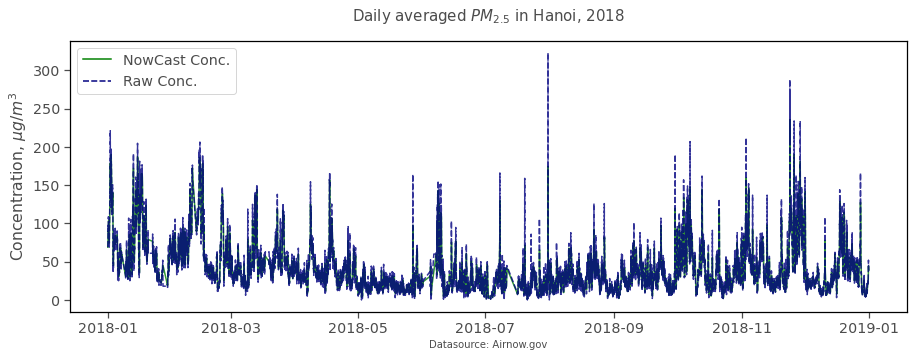

In [38]:
ax = sns.lineplot(data=df2[['NowCast Conc.', 'Raw Conc.']], palette = ['green', 'navy'], alpha=0.8)
ax.set_xlabel('Datasource: Airnow.gov', fontsize=10)
plt.title('Daily averaged $PM_{2.5}$ in Hanoi, 2018', fontsize=15, y=1.05)
plt.ylabel('Concentration, $\mu g/m^3$')
plt.show()

Zoom in a few instances, setting up the limits.

In [39]:
from datetime import datetime as dt

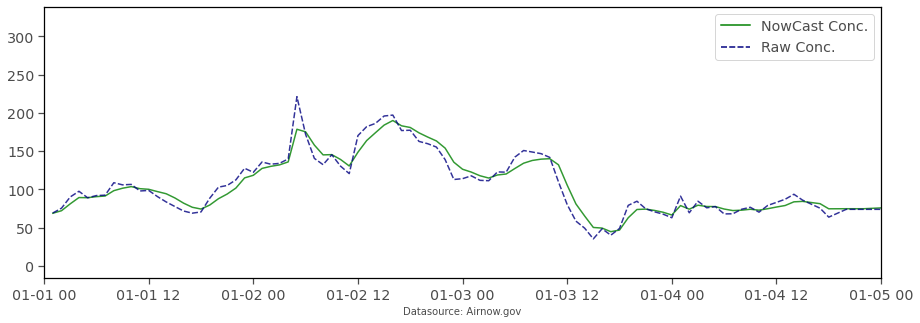

In [40]:
left = dt(2018,1,1)
right = dt(2018,1,5)
ax = sns.lineplot(data=df2[['NowCast Conc.', 'Raw Conc.']], palette = ['green', 'navy'], alpha=0.8)
ax.set_xlabel('Datasource: Airnow.gov', fontsize=10)
ax.set_xlim(left, right)
plt.show()

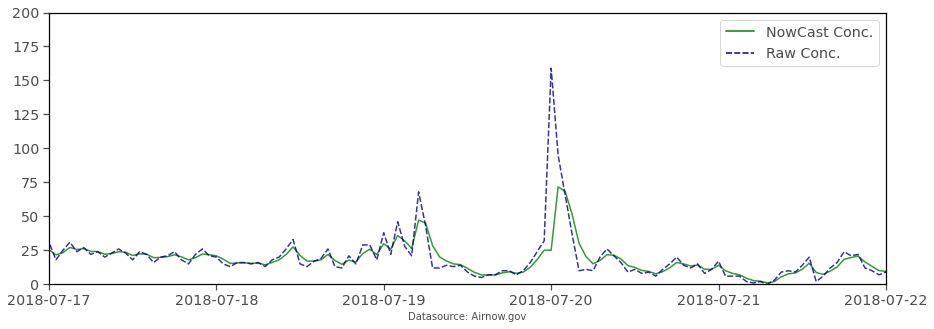

In [41]:
left = dt(2018,7,17)
right = dt(2018,7,22)
ax = sns.lineplot(data=df2[['NowCast Conc.', 'Raw Conc.']], palette = ['green', 'navy'], alpha=0.8)
ax.set_xlabel('Datasource: Airnow.gov', fontsize=10)
ax.set_xlim(left, right)
ax.set_ylim(0,200)
plt.show()

**Note**: `NowCast Conc.` is similar to the moving average that it smooths out the peak and present a more likely value for a longer period (day).

If we want to have statistics look, the boxplot is a good place start.

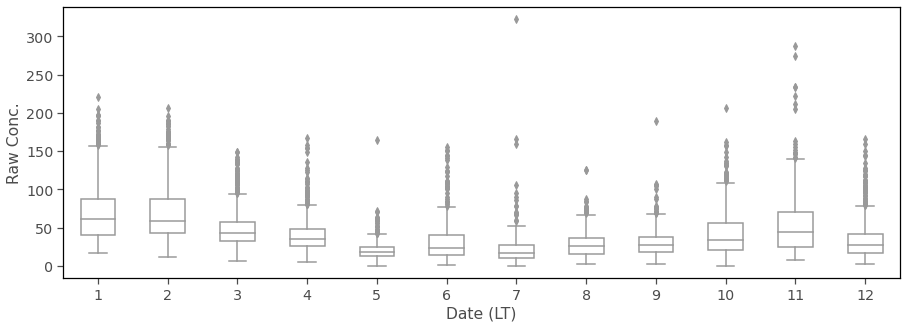

In [42]:
ax = sns.boxplot(data=df2, x=df2.index.month, y=df2['Raw Conc.'], width=0.5, palette=['white'])
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')

Comeback to the dft, or a daily average. 

In [43]:
dft2 = df2[['Raw Conc.']].resample('1D')

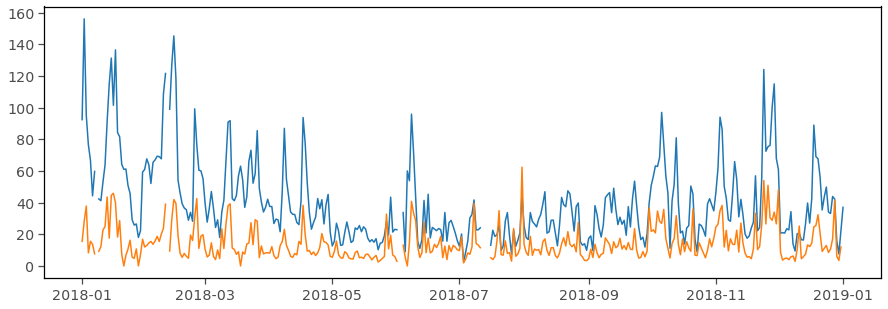

In [44]:
plt.plot(dft)
plt.plot(dft2.std())
plt.show()

In [45]:
std = dft2.std()
std.head()

Raw Conc.
Date (LT)            
2018-01-01  15.487127
2018-01-02  28.224719
2018-01-03  37.818703
2018-01-04   8.274930
2018-01-05  15.594304

The `fill_between()` function fill the area between two horizontal curves.
* the curves are defined by the points `(std.index, dft[dft.columns[0]] - std[std.columns[0]])` and `(std.index, dft[dft.columns[0]] + std[std.columns[0]])`

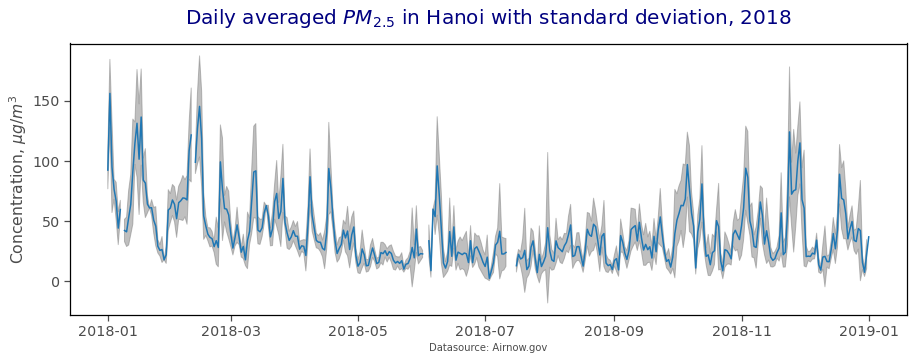

In [46]:
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'

# dft[dft.columns[0]] select the first column in the dataframe, alternatively, dft['Raw Conc.']
plt.fill_between(std.index, 
                 dft[dft.columns[0]] - std[std.columns[0]],
                 dft[dft.columns[0]] + std[std.columns[0]], 
                 color='gray',
                 alpha=0.5)
plt.plot(dft.index, dft.values)
plt.xlabel('Datasource: Airnow.gov', fontsize=10)
plt.title('Daily averaged $PM_{2.5}$ in Hanoi with standard deviation, 2018', 
          color='navy',
          fontsize=20, y=1.05)
plt.ylabel('Concentration, $\mu g/m^3$');

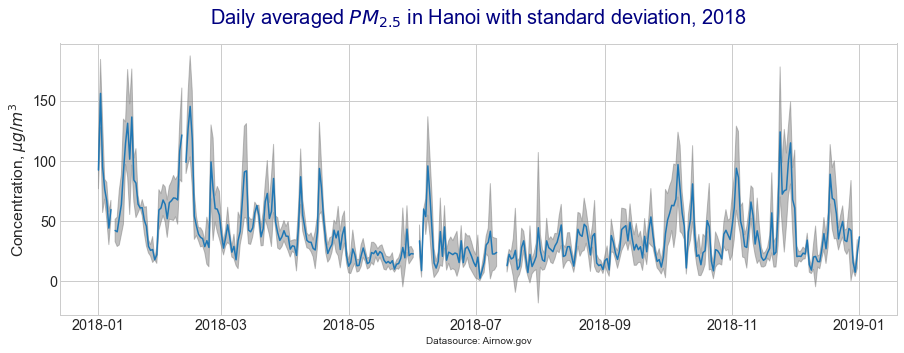

In [47]:
# use a setup style
plt.style.use('seaborn-whitegrid')
plt.fill_between(std.index, 
                 dft[dft.columns[0]] - std[std.columns[0]],
                 dft[dft.columns[0]] + std[std.columns[0]], 
                 color='gray',
                 alpha=0.5)
plt.plot(dft.index, dft.values)
plt.xlabel('Datasource: Airnow.gov', fontsize=10)
plt.title('Daily averaged $PM_{2.5}$ in Hanoi with standard deviation, 2018', 
          color='navy',
          fontsize=20, y=1.05)
plt.ylabel('Concentration, $\mu g/m^3$');

## Pie chart for AQI levels

- group by AQI label

In [48]:
print(df2.shape)
dfv = df2[df2['QC Name'] == 'Valid']
print(dfv.shape)

(8190, 5)
(7997, 5)


In [49]:
for_pie = dfv['AQI Category'].value_counts()
type(for_pie)
for_pie

Moderate                          3727
Unhealthy for Sensitive Groups    1843
Unhealthy                         1603
Good                               684
Very Unhealthy                      82
Name: AQI Category, dtype: int64

In [50]:
list(for_pie.index)

['Moderate',
 'Unhealthy for Sensitive Groups',
 'Unhealthy',
 'Good',
 'Very Unhealthy']

In [51]:
colormap

{'Very Unhealthy': 'purple',
 'Unhealthy': 'red',
 'Unhealthy for Sensitive Groups': 'orange',
 'Moderate': 'yellow',
 'Good': 'green'}

To show the percent value on the pie plot, you need to use the `autopct` parameter.

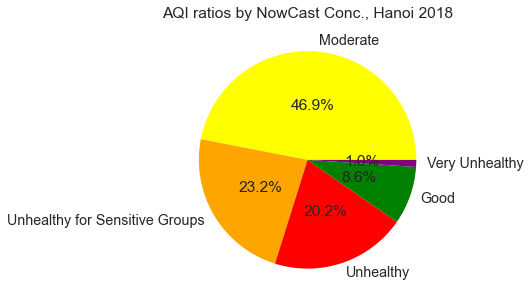

In [52]:
plt.pie(for_pie, 
        labels=list(for_pie.index),
        colors=['yellow', 'orange', 'red', 'green', 'purple'], autopct='%1.1f%%', pctdistance=0.5);
plt.title('AQI ratios by NowCast Conc., Hanoi 2018');

- ref comprehensive for pie: https://blog.algorexhealth.com/2018/03/almost-10-pie-charts-in-10-python-libraries/

In [53]:
dft.head()

Raw Conc.
Date (LT)             
2018-01-01   92.373913
2018-01-02  156.020833
2018-01-03   94.995833
2018-01-04   76.527273
2018-01-05   66.666667

In [54]:
# a dictionary for PM2.5 category
aqi = {
    'Good':{'pm2.5': [0, 12], 'color': 'green'},
    'Moderate': {'pm2.5': [12.1, 35.4], 'color': 'yellow'},
    'Unhealthy for Sensitive Groups':{'pm2.5': [35.5, 55,4], 'color': 'orange'},
    'Unhealthy': {'pm2.5': [55.5, 150.4], 'color': 'red'},
    'Very Unhealthy': {'pm2.5': [150.5, 250.5], 'color': 'purple'},
    'Hazardous': {'pm2.5': [250.5, 500.4], 'color': 'maroon'}}

In [55]:
bins = [x['pm2.5'][0] for x in list(aqi.values())]
bins

[0, 12.1, 35.5, 55.5, 150.5, 250.5]

In [56]:
bins.append(aqi['Hazardous']['pm2.5'][-1])
bins

[0, 12.1, 35.5, 55.5, 150.5, 250.5, 500.4]

In [57]:
dfvc = dfv[['Raw Conc.']]

The `cut()` function bins values into discrete intervals.

In [58]:
print(dfvc.head())
for_pie2 = pd.cut(dfvc['Raw Conc.'], bins=bins, labels= list(aqi.keys()), include_lowest=True).value_counts()

                     Raw Conc.
Date (LT)                     
2018-01-01 01:00:00       69.2
2018-01-01 02:00:00       75.5
2018-01-01 03:00:00       90.2
2018-01-01 04:00:00       97.6
2018-01-01 05:00:00       89.1


In [59]:
for_pie2

Moderate                          3595
Unhealthy for Sensitive Groups    1810
Unhealthy                         1607
Good                               883
Very Unhealthy                      99
Hazardous                            3
Name: Raw Conc., dtype: int64

In [60]:
print(dft.head())
for_pie3 = pd.cut(dft['Raw Conc.'], bins=bins, labels= list(aqi.keys()), include_lowest=True).value_counts()

             Raw Conc.
Date (LT)             
2018-01-01   92.373913
2018-01-02  156.020833
2018-01-03   94.995833
2018-01-04   76.527273
2018-01-05   66.666667


In [61]:
for_pie3

Moderate                          177
Unhealthy for Sensitive Groups     91
Unhealthy                          75
Good                               14
Very Unhealthy                      1
Hazardous                           0
Name: Raw Conc., dtype: int64

**Note**: the color is messed up, we will fix it by the end.

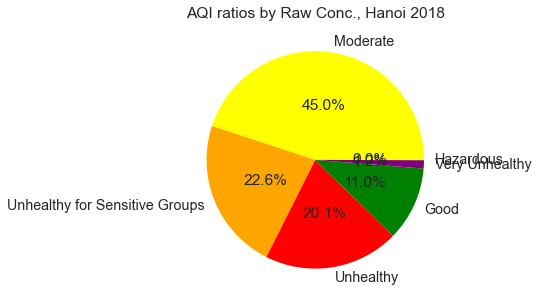

In [62]:
plt.pie(for_pie2, 
        labels=list(for_pie2.index),
        colors=['yellow', 'orange', 'red', 'green', 'purple'], 
        autopct='%1.1f%%',
       pctdistance=0.5) 
plt.title('AQI ratios by Raw Conc., Hanoi 2018');

Combine three pies in one plate.

In [63]:
all_pies = pd.concat([for_pie, for_pie2, for_pie3], axis=1)
all_pies.columns = ['NowCast,h', 'Raw,h', 'Raw,d']
all_pies

NowCast,h  Raw,h  Raw,d
Moderate                           3727.0   3595    177
Unhealthy for Sensitive Groups     1843.0   1810     91
Unhealthy                          1603.0   1607     75
Good                                684.0    883     14
Very Unhealthy                       82.0     99      1
Hazardous                             NaN      3      0

In [64]:
all_pies = all_pies.reindex(aqi.keys())
all_pies

NowCast,h  Raw,h  Raw,d
Good                                684.0    883     14
Moderate                           3727.0   3595    177
Unhealthy for Sensitive Groups     1843.0   1810     91
Unhealthy                          1603.0   1607     75
Very Unhealthy                       82.0     99      1
Hazardous                             NaN      3      0

Drop the last column, otherwise the percetage will not work.

In [65]:
all_pies.drop(labels='Hazardous', inplace=True)

In [66]:
colors = [x['color'] for x in aqi.values()]
colors

['green', 'yellow', 'orange', 'red', 'purple', 'maroon']

The `pctdistance` parameter in the `pie()` function allows us to change the position of the label with respect to the widget.

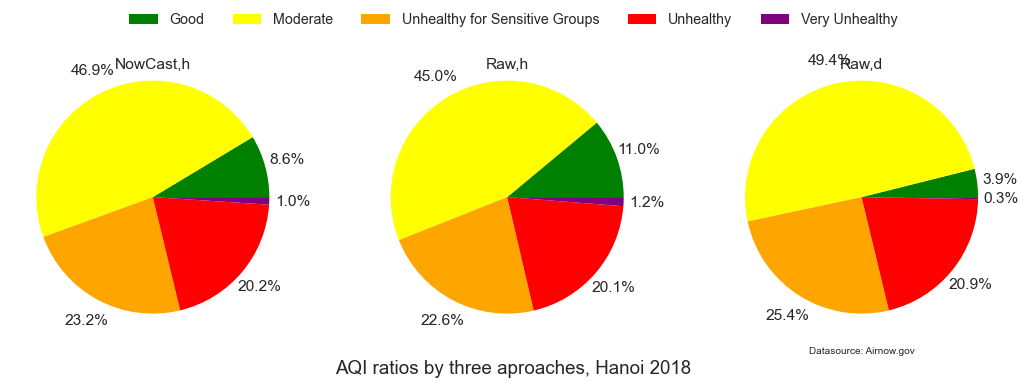

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=3)
for i, col in enumerate(all_pies.columns):
    axes[i].pie(all_pies[col], 
            colors=colors, autopct='%1.1f%%', pctdistance=1.2)
    axes[i].set_title(col, y=0.92)
fig.legend(list(all_pies.index), ncol=6, loc='upper center')
fig.suptitle('AQI ratios by three aproaches, Hanoi 2018', y=0)
axes[2].set_xlabel('Datasource: Airnow.gov', fontsize=10)
fig.tight_layout()
fig.savefig(f'{IMAGES_PATH}/multipies_2018Jul-AQI.png', dpi=120)